In [1]:
from imports import *
import dmc

%matplotlib inline
# NOTE: The "%..." directives must be directly in the notebook

Welcome to JupyROOT 6.28/10


In [23]:
def niceGrid(nchan):
    """Factor value 'nchan' into nice grid, either NxN or Nx(N+1).
       There may be empty slots in the bottom row."""
    sqrtn = int(ceil(sqrt(nchan)))
    lo,hi = sqrtn-1,sqrtn+1
    if (lo*sqrtn >= nchan): return lo,sqrtn
    if (sqrtn*sqrtn >= nchan): return sqrtn,sqrtn
    return sqrtn,hi

def TEStiles(file,outname,title,event=0):
    """Make 4x3 tiled set of HV100mm TES channel plots."""
    reader = dmc.traceReader(file)
    chans = reader.channels("TES")
    bins = reader.timeBins("TES")

    rows,cols = niceGrid(len(chans))
    fig, axes = subplots(rows,cols,figsize=(9,6), dpi = 200)
    fig.set_tight_layout(True)

    for chan in range(len(chans)):
        currentAxis = axes.flatten()[chan]
    
        # Get TES trace for plotting
        trace = reader.TES(event, chan)
        currentAxis.plot(bins, trace, lw=1, color = 'C0', label=chans[chan])
    
        currentAxis.set_xlim([-100.,2000.])
        currentAxis.set_xlabel("Time [\u03BCs]")
        currentAxis.set_ylabel("Trace [\u03BCA]")
        currentAxis.legend()     # Puts channel name inside box

    fig.suptitle(title)
    fig.savefig(outname+".png")

In [3]:
def TESoverlay(file,outname,title,event=0):
    """Make single plot showing all 12 HV100mm TES channels."""
    fig = plt.figure(figsize=(6,4),dpi=200)

    reader = dmc.traceReader(file)
    bins = reader.timeBins("TES")
    chans,traces = reader.plottableTES(event)

    currentAxis = plt.gca()
    currentAxis.plot(bins,traces,lw=1,label=chans)
    
    currentAxis.set_xlim([-100.,2000.])
    currentAxis.set_xlabel("Time [\u03BCs]")
    currentAxis.set_ylabel("Trace [\u03BCA]")
    currentAxis.legend()     # Puts channel name inside box
    fig.suptitle(title)
    fig.savefig(outname+".png")

In [6]:
# Only one directory currently on Cedar
datadir = "data/CDMSlite/"
oneEvent = datadir+"CDMSlite1-RikV3-Cedar_51250312_0000.root"

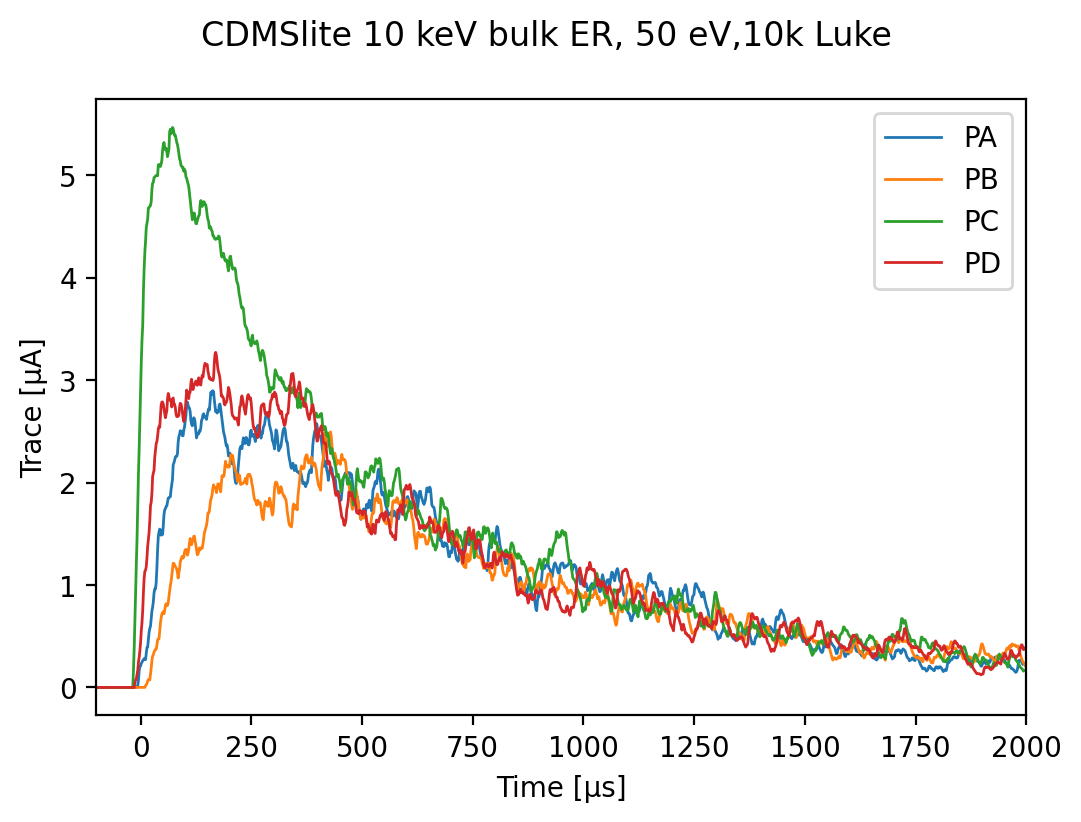

In [7]:
TESoverlay(oneEvent, datadir+"CDMSlite",
           "CDMSlite 10 keV bulk ER, 50 eV,10k Luke")

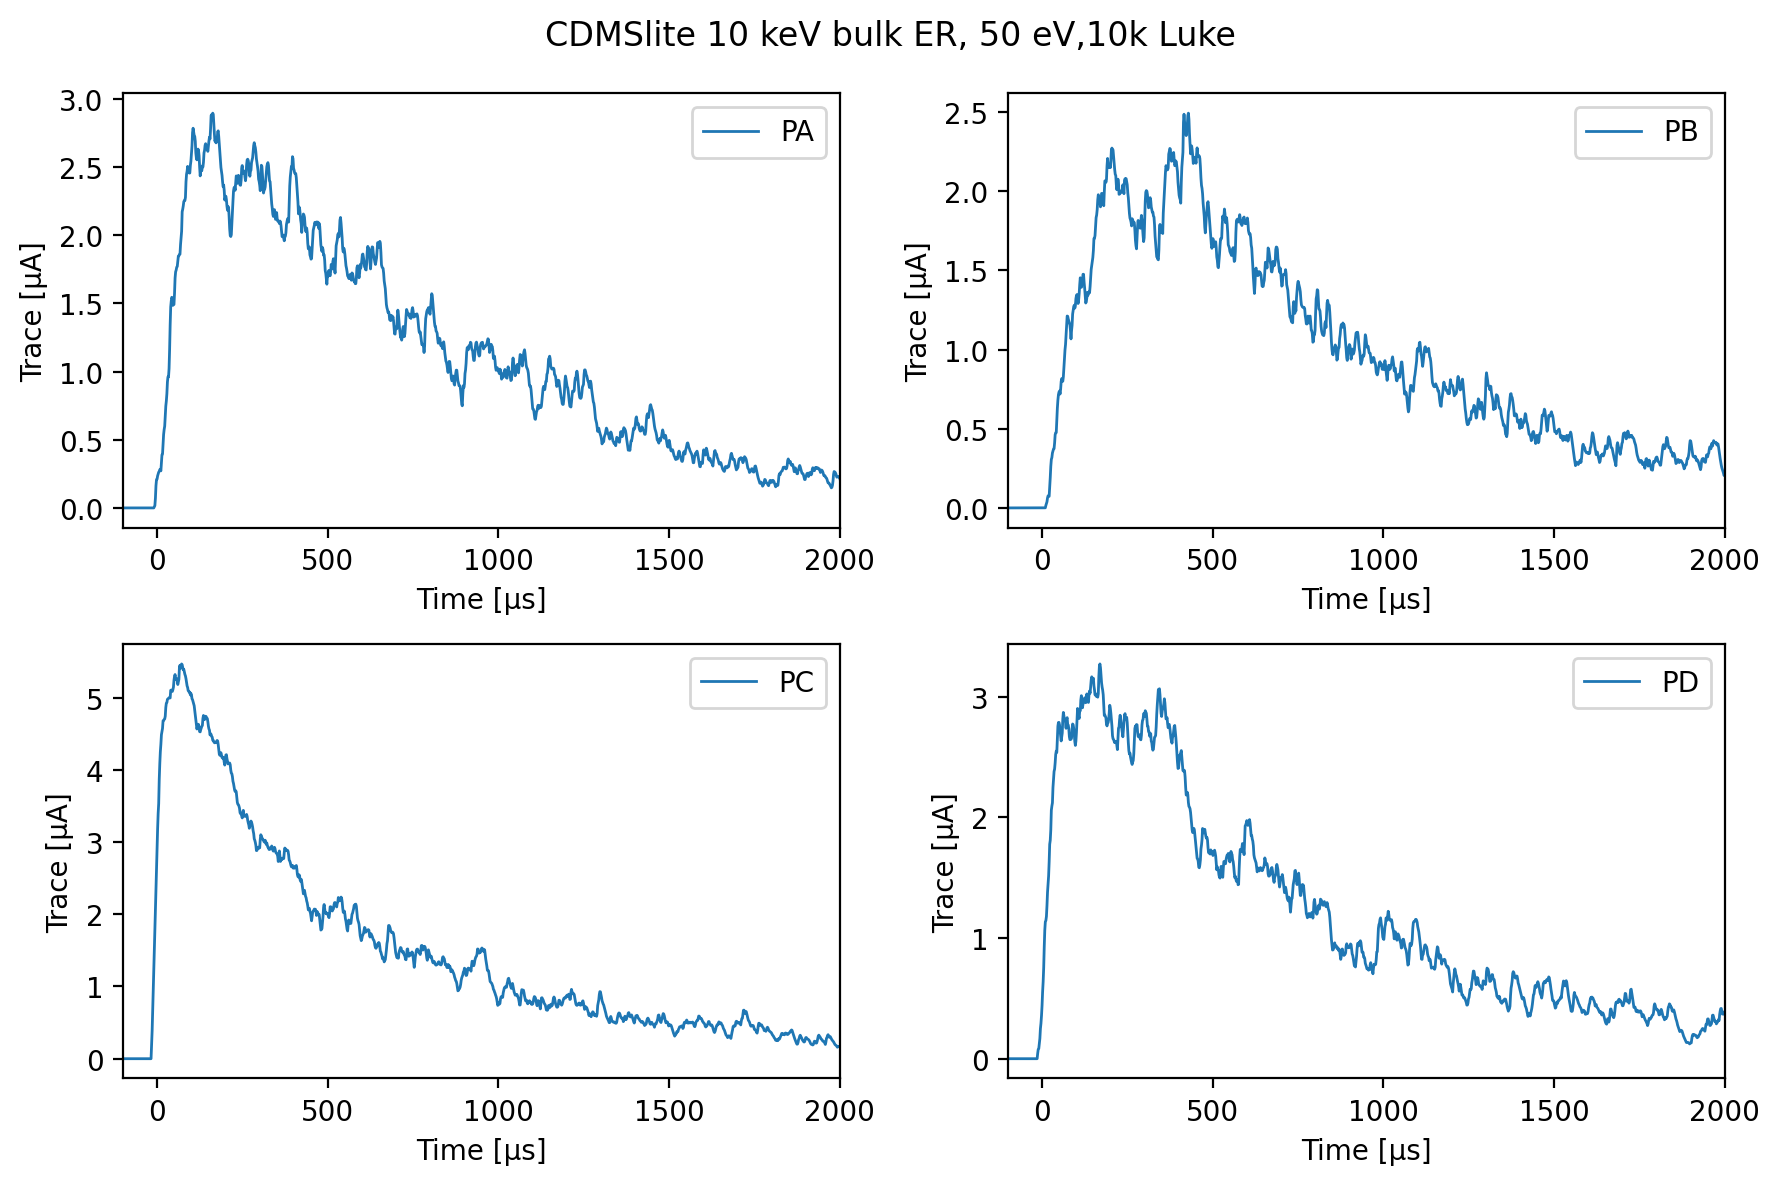

In [16]:
TEStiles(oneEvent, datadir+"CDMSlite",
           "CDMSlite 10 keV bulk ER, 50 eV,10k Luke")

In [ ]:
# Several input files useful for testing
# (only available on Grace (TAMU HPRC)
datadir = "data/Luke_debugging/"

maxL10k  = datadir+"10keV-Luke10000-E100eV_51250203_000000.root"
maxL10k1keV = datadir+"10keV-Luke10000-E1keV_51250128_000000.root"
maxL100k = datadir+"10keV-Luke100000-E100eV_51250127_000000.root"
maxL300k = datadir+"10keV-Luke300000-E100eV_51250127_000000.root"
maxL30M  = datadir+"10keV-Luke30000000-E100eV_51250127_000000.root"
maxLinf  = datadir+"10keV-Luke-1-E100eV_51250127_000000.root"

maxL10kiZIP7  = datadir+"10keV-iZIP7-Luke10000-E100eV_51250203_000000.root"
maxL300kiZIP7 = datadir+"10keV-iZIP7-Luke300000-E100eV_51250203_000000.root"

maxL300k100eVLite = datadir+"10keV-CDMSlite-Luke300000-E100eV_51250203_0000.root"

In [ ]:
TESoverlay(maxL10k, datadir+"maxLuke10k",
           "HV100mm 10 keV @ (0,0,0) maxLukePhonons 10k")

In [ ]:
TESoverlay(maxL100k,datadir+"maxLuke100k",
           "HV100mm 10 keV @ (0,0,0) maxLukePhonons 100k")

In [ ]:
TESoverlay(maxL300k,datadir+"maxLuke300k",
           "HV100mm 10 keV @ (0,0,0) maxLukePhonons 300k")

In [ ]:
TESoverlay(maxL30M, datadir+"maxLuke30M", 
           "HV100mm 10 keV @ (0,0,0) maxLukePhonons 30M")

In [ ]:
TESoverlay(maxLinf, datadir+"maxLukeInf", 
           "HV100mm 10 keV @ (0,0,0) no phonon limit")

In [ ]:
TESoverlay(maxL10k1keV, datadir+"maxL10k1keV", 
           "HV100mm 10 keV @ (0,0,0) maxLuke 10k, Esamp 1keV")

In [ ]:
TESoverlay(maxL300kiZIP7, datadir+"maxL300k-iZIP7", 
           "iZIP7 10 keV @ (0,0,0) maxLukePhonons 300k")

In [ ]:
TESoverlay(maxL10kiZIP7, datadir+"maxL10k-iZIP7", 
           "iZIP7 10 keV @ (0,0,0) maxLukePhonons 10k")

In [ ]:
TESoverlay(maxL300k100eVLite, datadir+"maxL300k-CDMSlite", 
           "CDMSlite1 10 keV @ (0,0,0) maxLukePhonons 300k")